## 14 - What is the most common type of surface used in tournaments?

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tournament_files = glob('../data/raw/*/tournament_[0-9]*.parquet')

tournament_df = pd.concat([pd.read_parquet(f, columns=['match_id', 'ground_type']) for f in tournament_files])
tournament_df.head()

,match_id,ground_type
0,12078758,Hardcourt outdoor
0,12077806,Hardcourt outdoor
0,12080887,Hardcourt outdoor
0,12077592,Hardcourt outdoor
0,12077348,Red clay


In [2]:
# Cleaning Data
tournament_df_clean = tournament_df.dropna(subset=['ground_type'])

# Count each unique ground_type
ground_type_counts = tournament_df_clean['ground_type'].value_counts()
ground_type_counts.head()

ground_type
Hardcourt outdoor    16959
Red clay             11856
Hardcourt indoor      4741
Red clay indoor        512
Grass                  509
Name: count, dtype: int64

In [3]:
# Analysis
most_common_surface = ground_type_counts.idxmax()

print("\nAnalysis:")
print(f"\nThe most common surface type is: {most_common_surface}")


Analysis:

The most common surface type is: Hardcourt outdoor


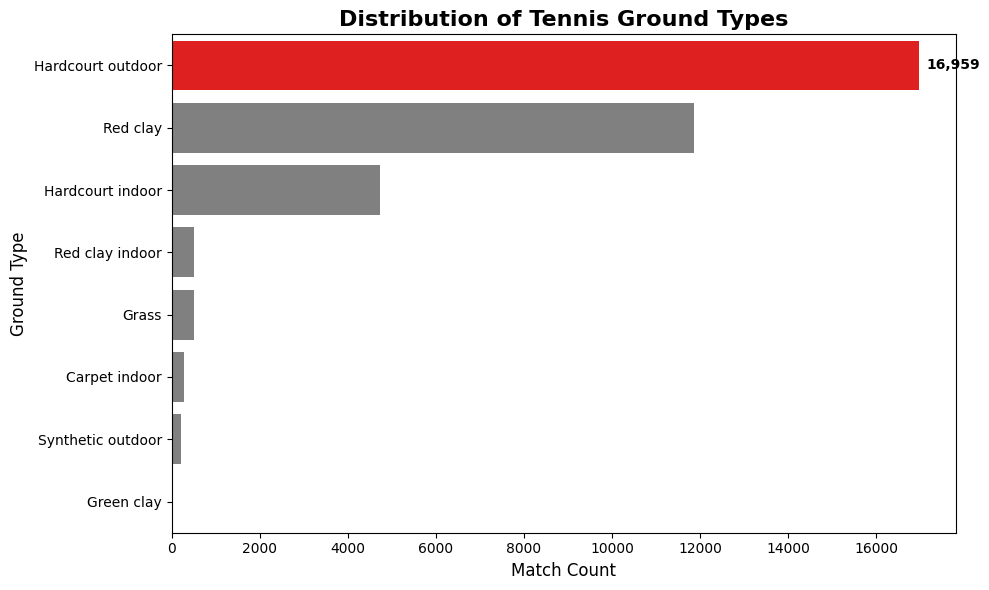

In [4]:
# Sort counts descending and prepare DataFrame
ground_type_counts_sorted = ground_type_counts.sort_values(ascending=False)
plot_df = ground_type_counts_sorted.reset_index()
plot_df.columns = ['ground_type', 'count']

# Highlight first row, normal others
plot_df['highlight'] = ['highlight'] + ['normal'] * (len(plot_df) - 1)

# Palette for highlighting
palette = {'highlight': 'red', 'normal': 'gray'}

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_df, y='ground_type', x='count', hue='highlight', dodge=False, palette=palette, legend=False)

# Annotate only the first bar
ax.text(
    plot_df['count'][0] + max(plot_df['count']) * 0.01,
    0,
    f"{plot_df['count'][0]:,}",
    va='center',
    fontsize=10,
    fontweight='bold'
)

# Visualization
plt.title("Distribution of Tennis Ground Types", fontsize=16, weight='bold')
plt.xlabel("Match Count", fontsize=12)
plt.ylabel("Ground Type", fontsize=12)
plt.tight_layout()
plt.savefig('../data/output/figures/img14.png')
plt.show()
